In [1]:
pwd

u'/home/ynu/python_pluto'

In [2]:
cd /home/ynu/PLUTO/two_snr/

/home/ynu/PLUTO/two_snr


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyPLUTO as pp
import seaborn as sns
%matplotlib inline

In [4]:
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.top']='True'
plt.rcParams['ytick.right']='True'
plt.rcParams['font.size']=14 #字体大小 包括xy轴的字体 colorbar的字体

In [72]:
D = pp.pload(13) # Loading the data into a pload object D.
#grid.out dbl.out should contain

In [73]:
type(D.rho.T)

numpy.ndarray

In [74]:
D.rho.T.size

1048576

In [75]:
D.rho.T.shape

(1024, 1024)

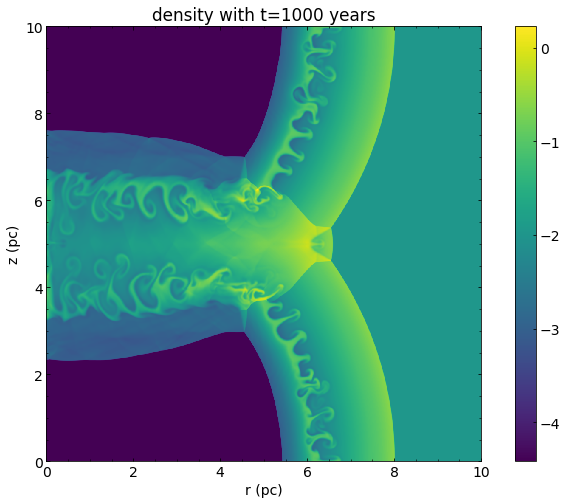

In [76]:
f1 = plt.figure(figsize=[12,8])
ax1 = f1.add_subplot(111)
plt.pcolormesh(D.x1,D.x2,np.log(D.rho.T))
plt.colorbar()
plt.minorticks_on()
ax1.set_xlabel(r'r (pc)')
ax1.set_ylabel(r'z (pc)')
ax1.axis([0,10,0.0,10.0])
ax1.set_aspect('equal')
ax1.set_title(r'density with t=1000 years')
plt.savefig('density10.png')#密度磁场图不能存为pdf会跑很久

In [10]:
D.x1.shape

(1024,)

In [11]:
D.rho.ndim

2

In [12]:
D.rho.size

1048576

In [13]:
#sns.set(style="darkgrid")
#因为D不是pandas的DF类型 所以无法直接用seaborn画 需要转化
x1change=D.x1.reshape((D.x1.size,1))
x2change=D.x2.reshape((D.x2.size,1))
rhochange=D.rho.reshape((D.rho.size,1))#要预先知道D.rho的形状 再reshape不太方便 用len和size都可以
prschange=D.prs.reshape((D.prs.size,1))#


In [14]:
x1change.shape

(1024, 1)

In [15]:
rhochange.shape

(1048576, 1)

In [16]:
rpsum=np.concatenate((rhochange,prschange),axis=1)
rpsum.shape
#行前列后

(1048576, 2)

In [17]:
datarp = pd.DataFrame(rpsum,columns=["rho","prs"])
datarp.head()

,rho,prs
0,0.025936,1.000000e-12
1,0.025937,1.000000e-12
2,0.025938,1.000000e-12
3,0.025939,1.000000e-12
4,0.025939,1.000000e-12


In [18]:
datarp.tail()

,rho,prs
1048571,0.14,0.000039
1048572,0.14,0.000039
1048573,0.14,0.000039
1048574,0.14,0.000039
1048575,0.14,0.000039


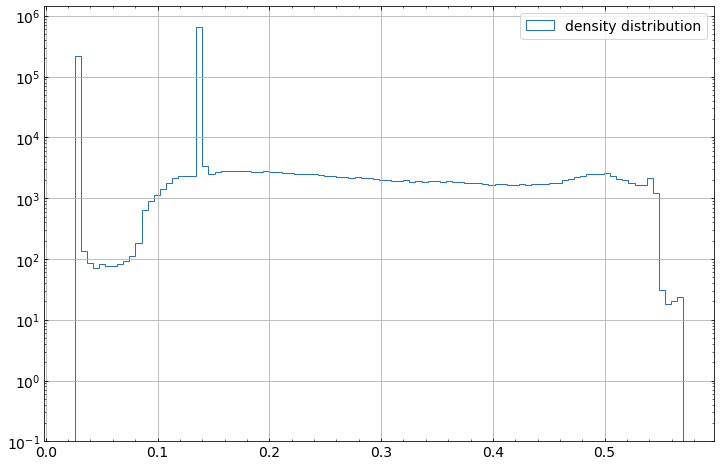

In [19]:
f1 = plt.figure(figsize=[12,8])
ax1 = f1.add_subplot(111)
plt.hist(x=datarp['rho'],bins=100,log=True,histtype='step',label='density distribution')
plt.minorticks_on()
plt.grid(True)
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu

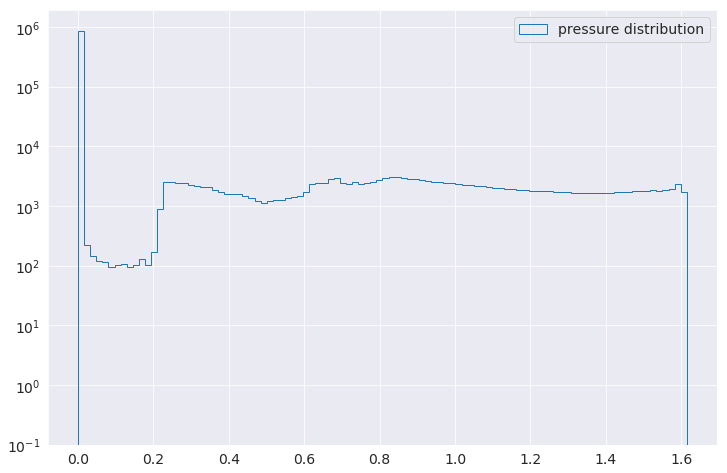

In [20]:
with sns.axes_style("darkgrid"): #临时设置背景
    f1 = plt.figure(figsize=[12,8])
    ax1 = f1.add_subplot(111)
    plt.hist(x=datarp['prs'],bins=100,log=True,histtype='step',label='pressure distribution')
    plt.minorticks_on()
    plt.grid(True)
    plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu